In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [215]:
#Parameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

In [216]:
#Read file with pandas
edmonton_file_path = 'edmonton_housing_data_Feb15_2022.csv'
edmonton_data = pd.read_csv(edmonton_file_path)
edmonton_data.columns

Index(['House Description', 'Price', 'Bedrooms', 'Bathrooms', 'Full Baths',
       'Square Footage', 'Acres', 'Year Built', 'Type', 'Sub-Type', 'Style',
       'Address', 'Area', 'Community', 'Condo', 'City', 'County', 'Province',
       'Postal Code', 'Features', 'Parking Spaces', 'Parking', 'Is Waterfront',
       'Has Pool', 'Interior', 'Interior Features', 'Heating', 'Fireplace',
       '# of Stories', 'Has Basement', 'Basement', 'Separate Entrance',
       'Exterior', 'Exterior Features', 'Construction', 'Foundation',
       'Elementary', 'Middle', 'High', 'Foreclosure', 'RE / Bank Owned',
       'Office', 'Bedrooms Above Grade', '# of Garages', 'Garages',
       'Half Baths', 'Fireplaces', 'Zoning', 'Lot Description', 'HOA Fees',
       'HOA Fees Freq.', 'Condo Fee'],
      dtype='object')

In [177]:
#Get target (price) and features
y = edmonton_data.Price
edmonton_features = ['Bedrooms', 'Bathrooms', 'Full Baths', 'Square Footage', 'Acres', 'Year Built']
X = edmonton_data[edmonton_features]

In [178]:
#Split data into training and validation data
#Set random_state=0 to get same split every time
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=0)

In [179]:
# Clean the data
# Convert strings to float (Square footage and price)
train_X['Square Footage'] = train_X['Square Footage'].str.replace(',', '').astype(float)
val_X['Square Footage'] = val_X['Square Footage'].str.replace(',', '').astype(float)
train_y = train_y.str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
val_y = val_y.str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [211]:
forest_model = RandomForestRegressor(random_state=1)
#Use gridsearch to make more accurate
forest_model_cv = RandomizedSearchCV(forest_model, param_grid, cv=3, n_iter=50, scoring='neg_mean_absolute_error', random_state=1)
forest_model_cv.fit(train_X, train_y)
edmonton_preds = forest_model_cv.predict(val_X)
#Mean Absoulte Error
print(mean_absolute_error(val_y, edmonton_preds))

93056.05378975044


In [212]:
# Relativ mean absolute error
relative_mae = (93056.05 / train_y.mean()) * 100
print(f"Relative MAE: {relative_mae:.2f}%") #Show

Relative MAE: 21.31%


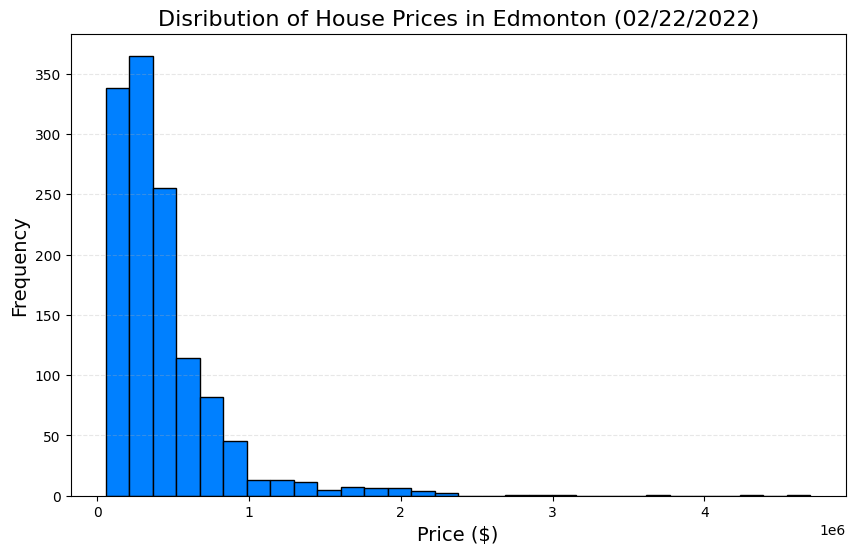

In [213]:
#Visual Representation as Histogram
plt.figure(figsize=(10,6)) #Width and Height
plt.hist(train_y, bins=30, edgecolor="black", color=(0.0,0.5,1.0)) #Seperations
plt.title("Disribution of House Prices in Edmonton (02/22/2022)", fontsize=16) #Title
plt.xlabel("Price ($)", fontsize=14) #x-axis label
plt.ylabel("Frequency", fontsize=14) #y-axis label
plt.grid(axis='y', linestyle='--', alpha=0.3) #Grid lines
plt.show() #Show